58


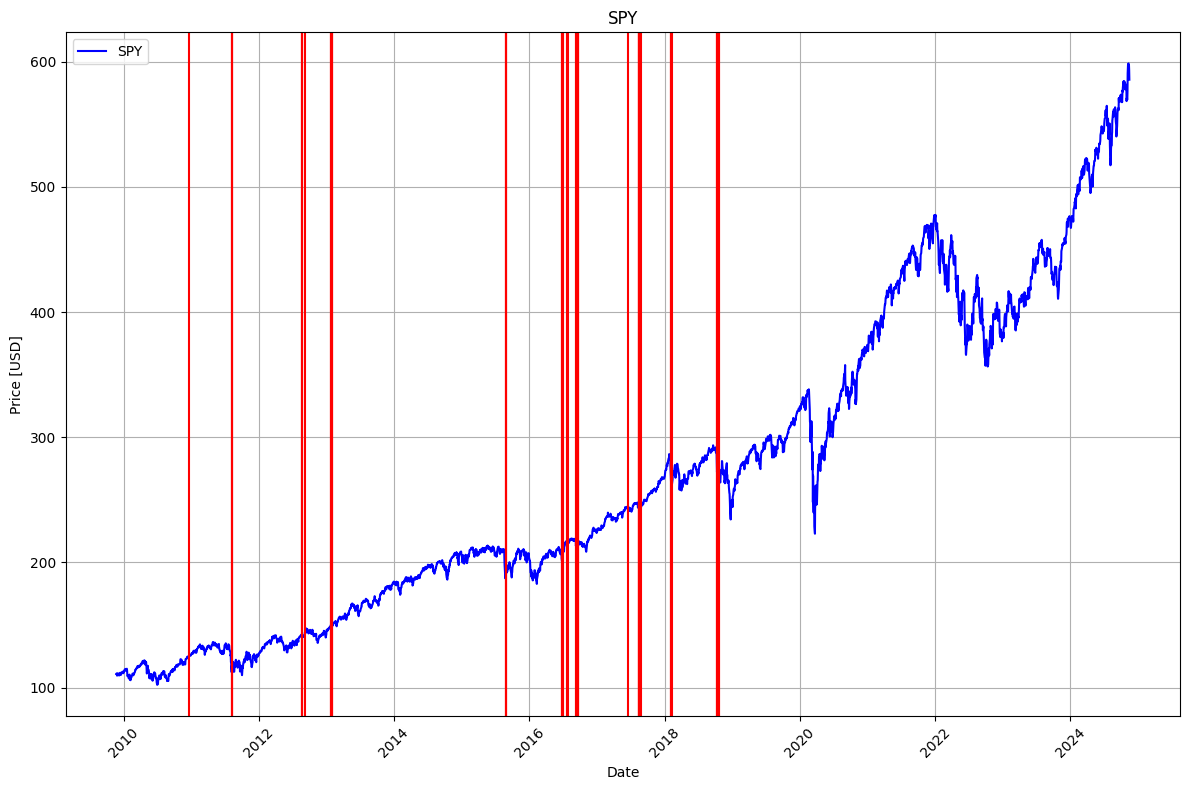

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

ticker = 'SPY'
df_asset = pd.read_parquet(f'../data/sectors/{ticker}_daily.parquet')

input_data_path = '../SPY_cpd21.csv'
cpd_data = pd.read_csv(input_data_path, index_col=0, parse_dates=True)
cpd_data['timestamp'] = cpd_data.index.to_series() # HACK!
cpd_data = cpd_data[cpd_data['cp_score'] > 0.9999]

plt.figure(figsize=(12, 8))
plt.plot(df_asset.index, df_asset['close'], 'b-', label=ticker);
for index, row in cpd_data.iterrows():
    plt.axvline(row['timestamp'], color='r')

plt.title(ticker)
plt.xlabel('Date')
plt.ylabel('Price [USD]')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
import ruptures as rpt

signal = df_asset['close'].to_numpy()

#algo = rpt.Pelt(model="rbf").fit(signal)
algo = rpt.Pelt(model="l2").fit(signal)
rpt_result = algo.predict(pen=10)



3771


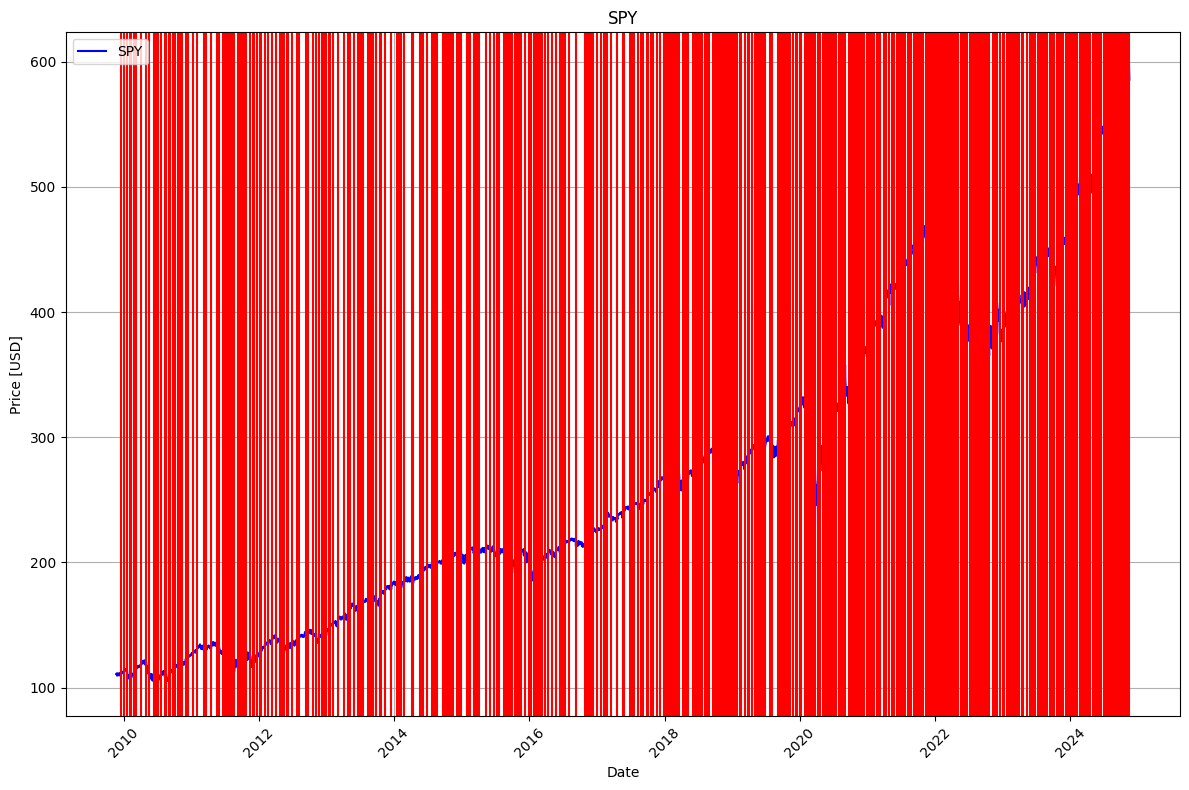

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(df_asset.index, df_asset['close'], 'b-', label=ticker);

print(len(df_asset))

for i in rpt_result:
    plt.axvline(df_asset.index[i-1], color='r')

plt.title(ticker)
plt.xlabel('Date')
plt.ylabel('Price [USD]')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()